/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

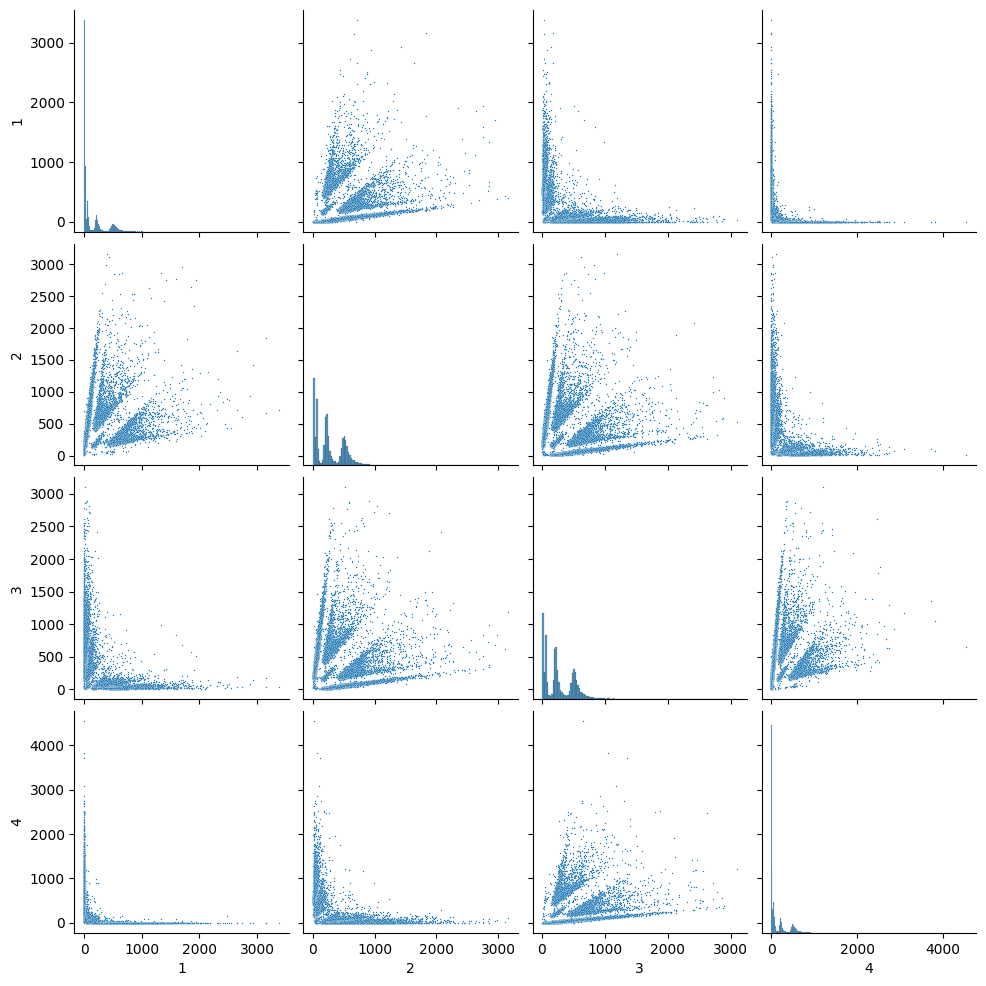

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

public = pd.read_csv('/kaggle/input/final1/public_data.csv')
private = pd.read_csv('/kaggle/input/final1/private_data.csv')

X_public = public.drop(columns=["id"])
X_private = private.drop(columns=["id"])

sns.pairplot(X_public, plot_kws={'s': 1})
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

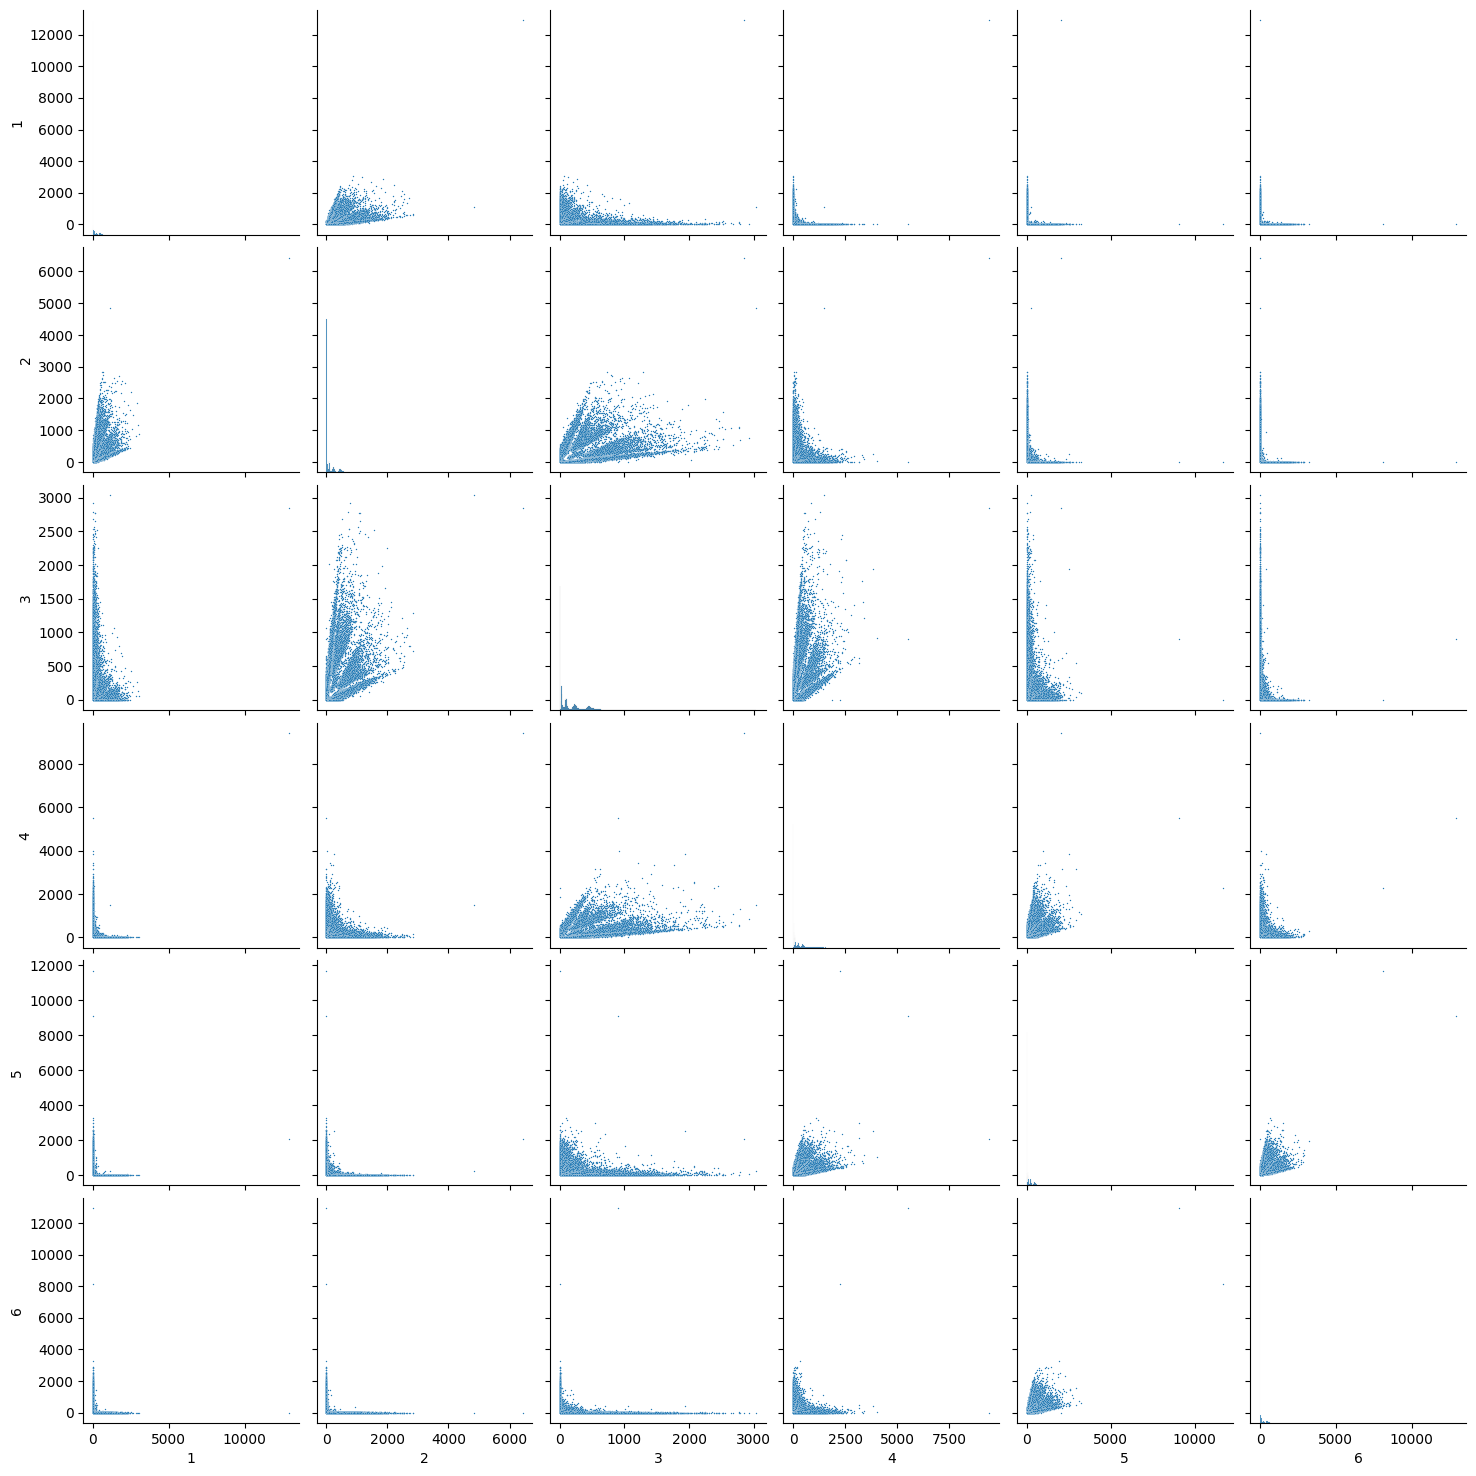

In [8]:
sns.pairplot(X_private, plot_kws={'s': 1})
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

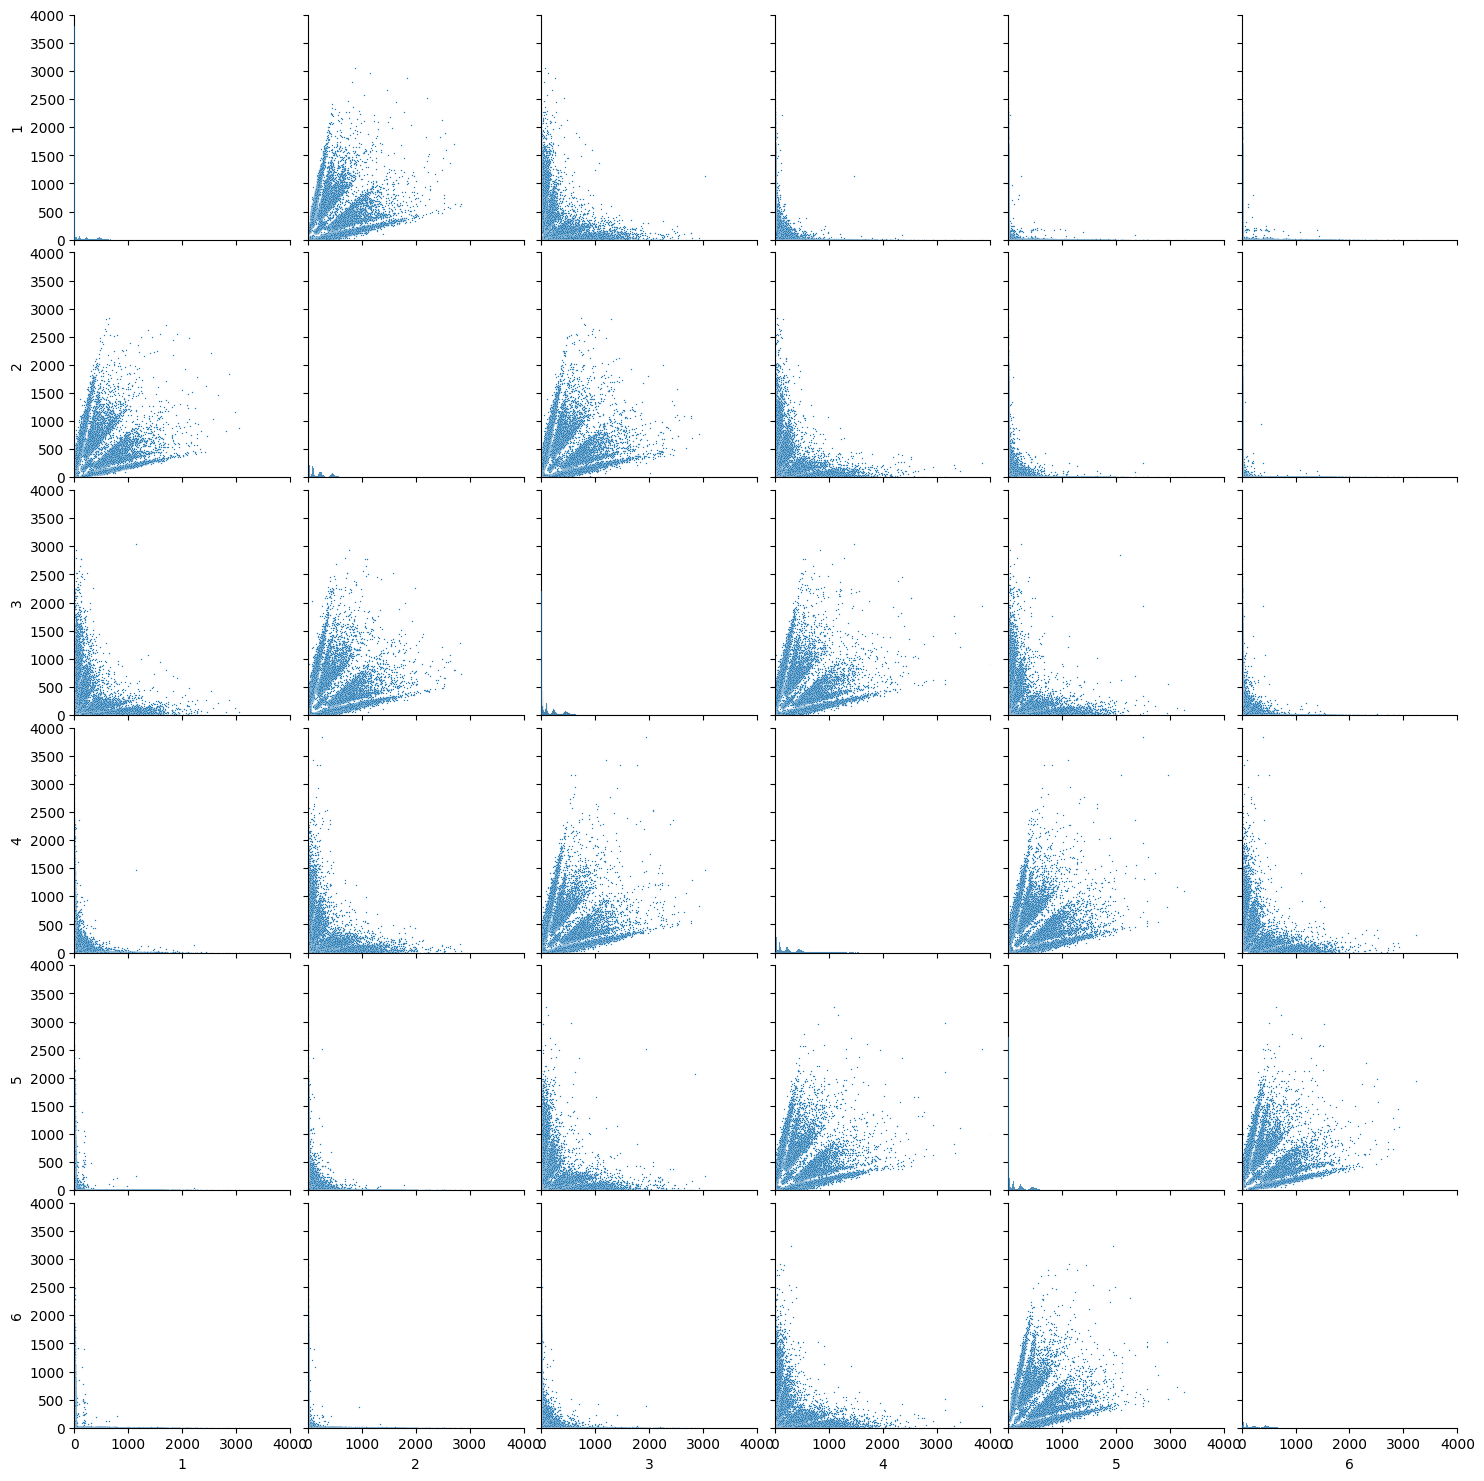

In [9]:
g = sns.pairplot(X_private, plot_kws={'s': 1})
for ax in g.axes.flat:
    ax.set_xlim(0, 4000)
    ax.set_ylim(0, 4000)
plt.show()

In [12]:
X_scaled_public = StandardScaler().fit_transform(X_public)

# GMM clustering
n_clusters = 15
gmm = GaussianMixture(n_components=n_clusters, covariance_type='tied', random_state=42)
labels = gmm.fit_predict(X_scaled_public)

# Save output
pd.DataFrame({'id': public["id"], 'label': labels}).to_csv('public_submission.csv', index=False)

In [14]:
from sklearn.cluster import SpectralClustering

# Spectral Clustering
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
labels = spectral.fit_predict(X_scaled_public)

pd.DataFrame({'id': public["id"], 'label': labels}).to_csv('public_submission.csv', index=False)

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X_scaled_public)

pd.DataFrame({'id': public["id"], 'label': labels}).to_csv('public_submission.csv', index=False)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
from sklearn.preprocessing import Normalizer

X_normalized_public = Normalizer().fit_transform(X_public)
X_normalized_private = Normalizer().fit_transform(X_private)

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init=10, random_state=42)
labels = kmeans.fit_predict(X_normalized_public)

pd.DataFrame({'id': public["id"], 'label': labels}).to_csv('public_submission.csv', index=False)

In [21]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage="average", metric="cosine")
labels = clustering.fit_predict(X_normalized_public)

pd.DataFrame({'id': public["id"], 'label': labels}).to_csv('public_submission.csv', index=False)
# 0.94

In [7]:
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 建立比值特徵：log(x_i / x_j)
log_ratios = []
names = []
epsilon = 1e-8 # 避免0
X = X_public.values 
for i, j in combinations(range(4), 2):
    with np.errstate(divide='ignore', invalid='ignore'):
        ratio = np.log((X[:, i] + epsilon) / (X[:, j] + epsilon))
        log_ratios.append(ratio.reshape(-1, 1))
        names.append(f"log(x{i+1}/x{j+1})")

X_ratio_public = np.hstack(log_ratios)

# 標準化
X_scaled_ratio_public = StandardScaler().fit_transform(X_ratio_public)

# Clustering
n_clusters = 15
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X_scaled_ratio_public)

# 輸出
pd.DataFrame({'id': public["id"], 'label': labels}).to_csv('public_submission.csv', index=False)
print(names)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['log(x1/x2)', 'log(x1/x3)', 'log(x1/x4)', 'log(x2/x3)', 'log(x2/x4)', 'log(x3/x4)']


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

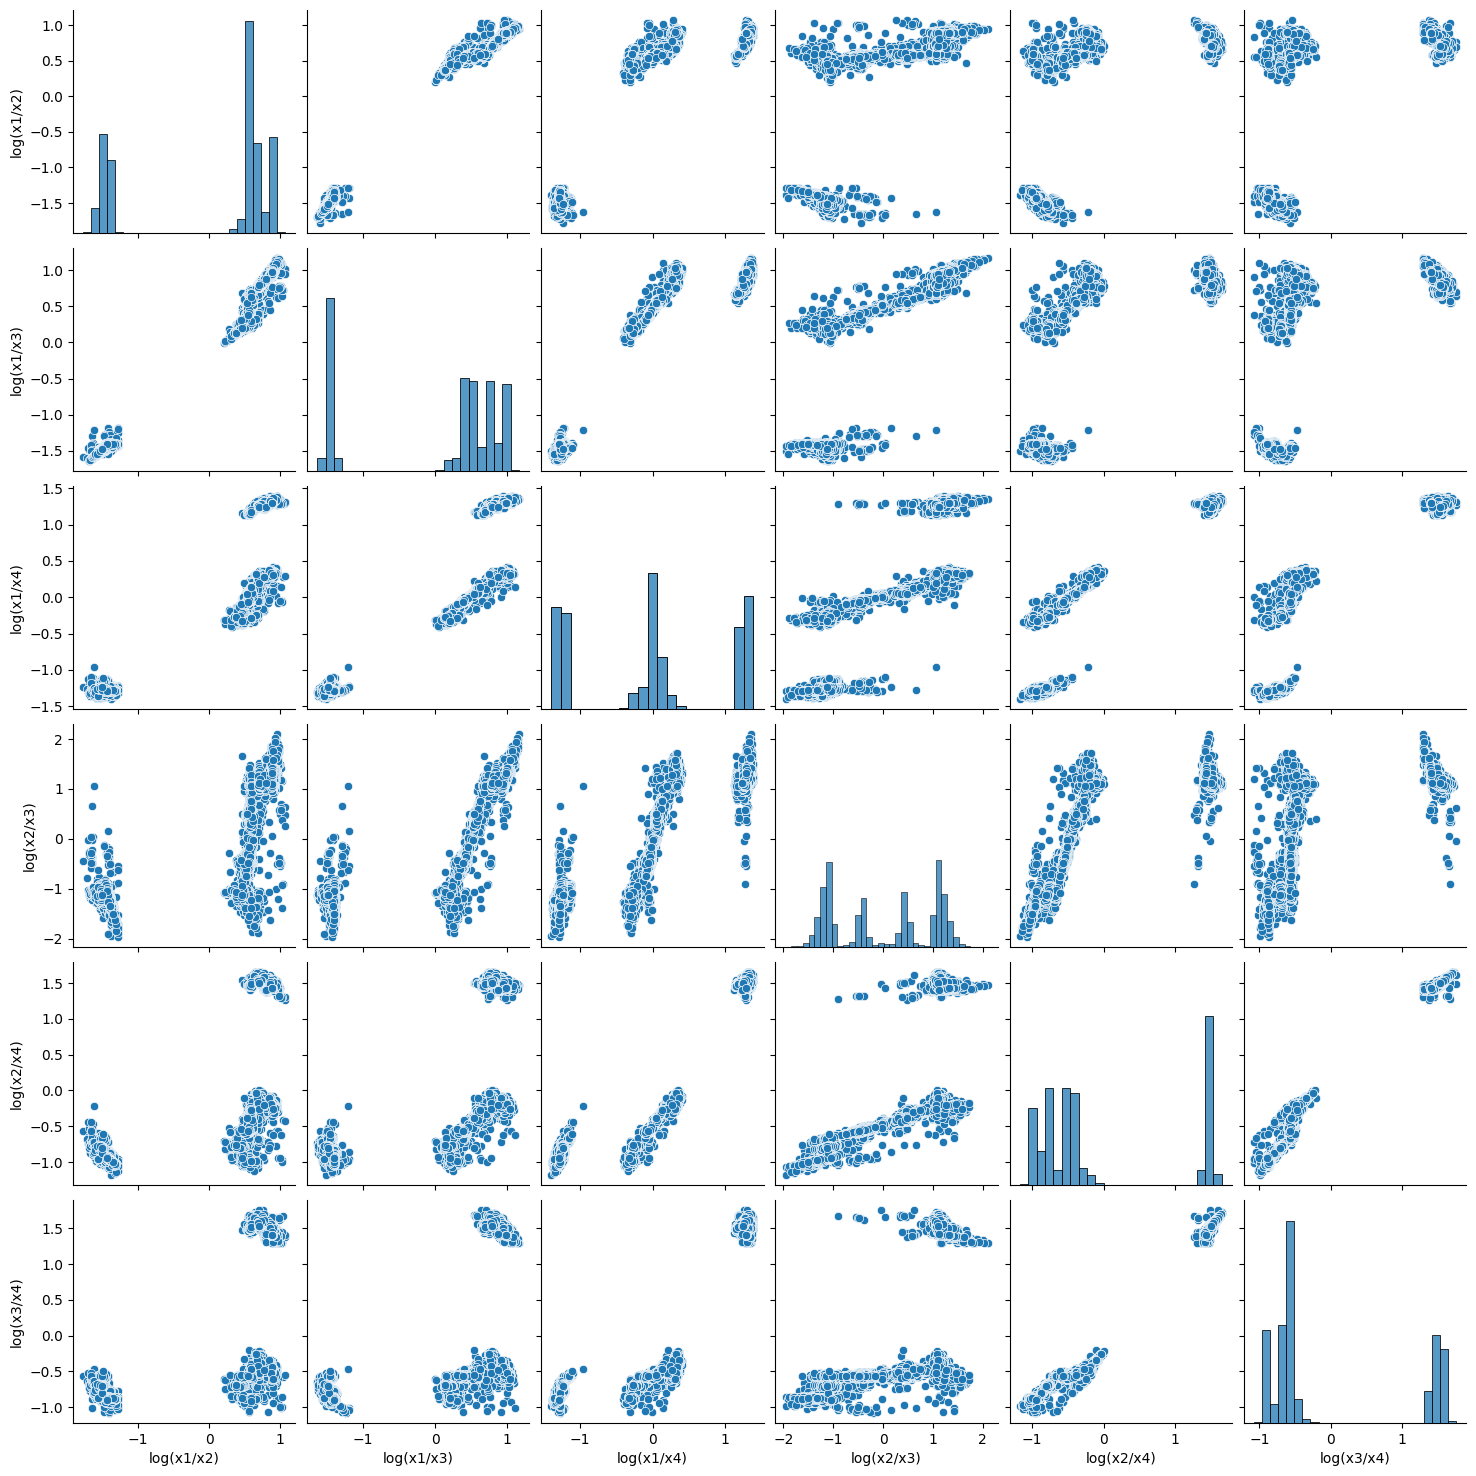

In [10]:
# 轉成 DataFrame
df_log_ratio = pd.DataFrame(X_scaled_ratio_public, columns=names)

# 畫 pairplot（注意可能會很慢，如果特徵數很多）
sns.pairplot(df_log_ratio)
plt.show()

In [13]:
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=42)
labels = gmm.fit_predict(X_scaled_ratio_public)

pd.DataFrame({'id': public["id"], 'label': labels}).to_csv('public_submission.csv', index=False)


In [12]:
from sklearn.cluster import SpectralClustering

# Spectral Clustering
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
labels = spectral.fit_predict(X_scaled_ratio_public)

pd.DataFrame({'id': public["id"], 'label': labels}).to_csv('public_submission.csv', index=False)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [17]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = clustering.fit_predict(X_scaled_ratio_public)

pd.DataFrame({'id': public["id"], 'label': labels}).to_csv('public_submission.csv', index=False)

In [18]:
from sklearn.preprocessing import Normalizer
X_normalized_ratio_public = Normalizer().fit_transform(X_ratio_public)

clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage="average", metric="cosine")
labels = clustering.fit_predict(X_normalized_ratio_public)

pd.DataFrame({'id': public["id"], 'label': labels}).to_csv('public_submission.csv', index=False)

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 建立比值特徵：log(x_i / x_j)
log_ratios = []
names = []
epsilon = 1e-8 # 避免0
X = X_public.values 
for i in range(3):
    with np.errstate(divide='ignore', invalid='ignore'):
        j = i + 1
        ratio = (X[:, i] + epsilon) / (X[:, j] + epsilon)
        log_ratios.append(ratio.reshape(-1, 1))
        
X_ratio_public = np.hstack(log_ratios)

# 標準化
X_scaled_ratio_public = StandardScaler().fit_transform(X_ratio_public)

# Clustering
n_clusters = 15
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X_scaled_ratio_public)

# 輸出
pd.DataFrame({'id': public["id"], 'label': labels}).to_csv('public_submission.csv', index=False)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [3]:
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=42)
labels = gmm.fit_predict(X_scaled_ratio_public)

pd.DataFrame({'id': public["id"], 'label': labels}).to_csv('public_submission.csv', index=False)

In [5]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
labels = spectral.fit_predict(X_scaled_ratio_public)

pd.DataFrame({'id': public["id"], 'label': labels}).to_csv('public_submission.csv', index=False)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [7]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import Normalizer
X_normalized_ratio_public = Normalizer().fit_transform(X_ratio_public)

clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = clustering.fit_predict(X_normalized_ratio_public)

pd.DataFrame({'id': public["id"], 'label': labels}).to_csv('public_submission.csv', index=False)